In [3]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/thermodynamics.git@master matplotlib

  Cloning https://github.com/ParkhomenkoDV/thermodynamics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-hqifyuo9
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/thermodynamics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-hqifyuo9
  Resolved https://github.com/ParkhomenkoDV/thermodynamics.git to commit 6d3d0e09a2bb5b131970a556972e87271e3e2652
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-kba8b9wi/mathematics_6638e4aaf5064bd7ae2dc39e0d1c9726
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git /pri

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from thermodynamics import gas_const, heat_capacity_p, gdf, atmosphere_standard, parameters, stoichiometry, heat_capacity_p_exhaust

In [5]:
for alias, parameter in parameters.items():
    print(f"{alias:<5}: {parameter}")

m    : mass
t    : temperature
p    : pressure
d    : density
mf   : mass_flow
gc   : gas_const


/Users/daniilandryushin/Projects/thermodynamics/.venv/lib/python3.12/site-packages/thermodynamics/thermodynamics.py:41: RuntimeWarning: invalid value encountered in scalar power
  return gdf("T", equivalent_speed, adiabatic_index) ** (adiabatic_index / (adiabatic_index - 1))
/Users/daniilandryushin/Projects/thermodynamics/.venv/lib/python3.12/site-packages/thermodynamics/thermodynamics.py:43: RuntimeWarning: invalid value encountered in scalar power
  return gdf("T", equivalent_speed, adiabatic_index) ** (1 / (adiabatic_index - 1))


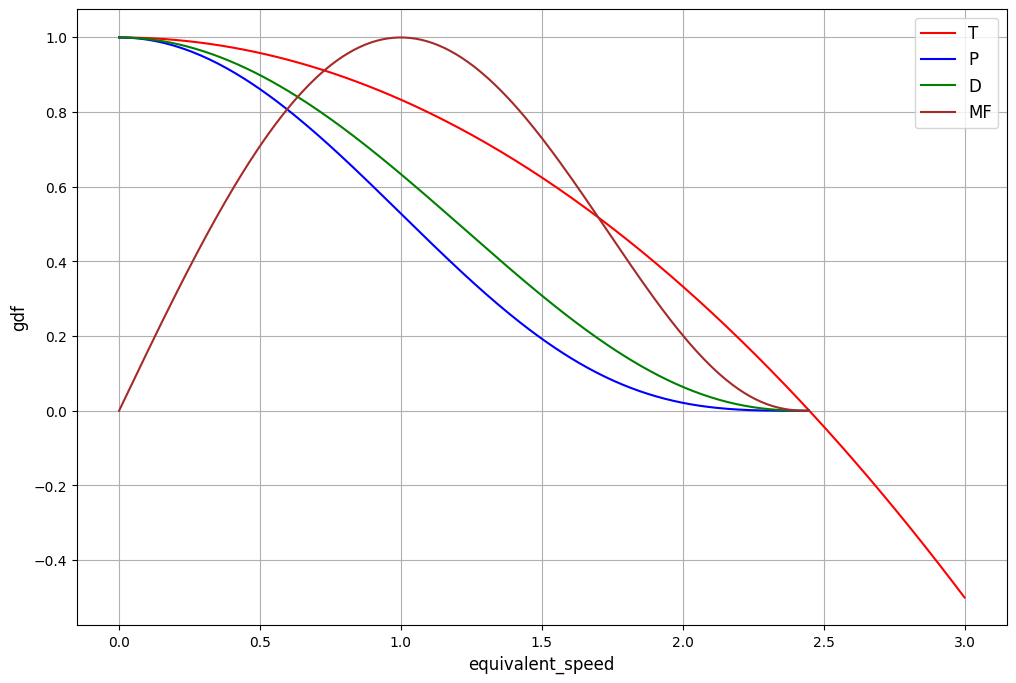

In [6]:
equivalent_speed = np.linspace(0, 3, 300)
k = 1.4

plt.figure(figsize=(12, 8))
plt.xlabel("equivalent_speed", fontsize=12)
plt.ylabel("gdf", fontsize=12)
plt.grid()
plt.plot(equivalent_speed, [gdf("T", es, k) for es in equivalent_speed], color="red", label="T")
plt.plot(equivalent_speed, [gdf("P", es, k) for es in equivalent_speed], color="blue", label="P")
plt.plot(equivalent_speed, [gdf("D", es, k) for es in equivalent_speed], color="green", label="D")
plt.plot(equivalent_speed, [gdf("MF", es, k) for es in equivalent_speed], color="brown", label="MF")
plt.legend(fontsize=12)
plt.show()

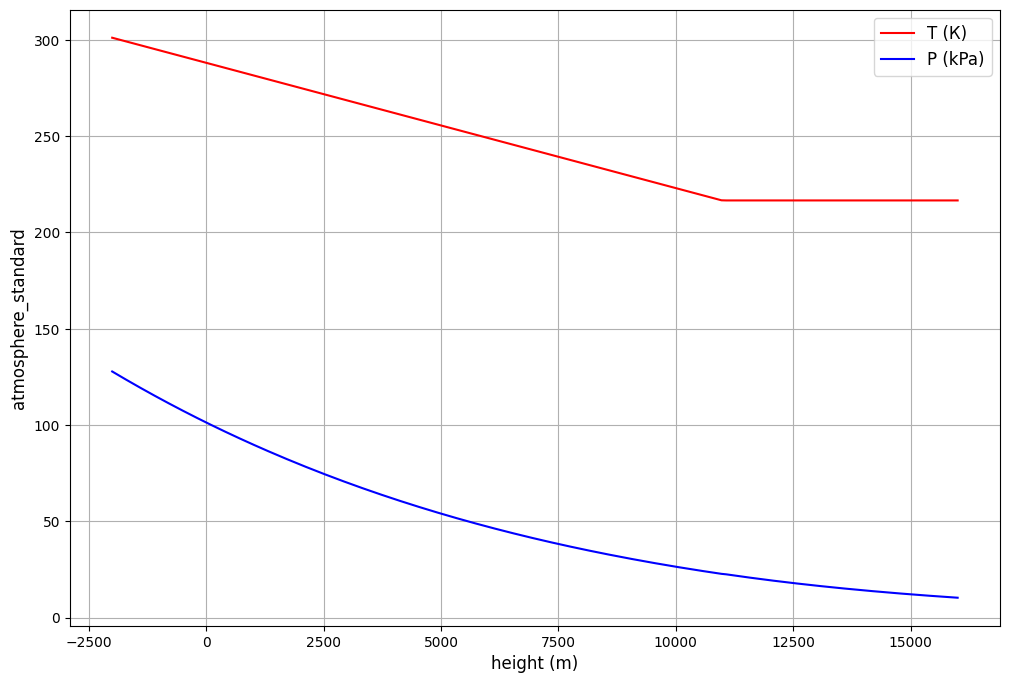

In [7]:
height = np.linspace(-2000, 16_000, 180)

plt.figure(figsize=(12, 8))
plt.xlabel("height (m)", fontsize=12)
plt.ylabel("atmosphere_standard", fontsize=12)
plt.grid()
plt.plot(height, [atmosphere_standard(h)["temperature"][0] for h in height], color="red", label="T (К)")
plt.plot(height, [atmosphere_standard(h)["pressure"][0] / 1000 for h in height], color="blue", label="P (kPa)")
plt.legend(fontsize=12)
plt.show()

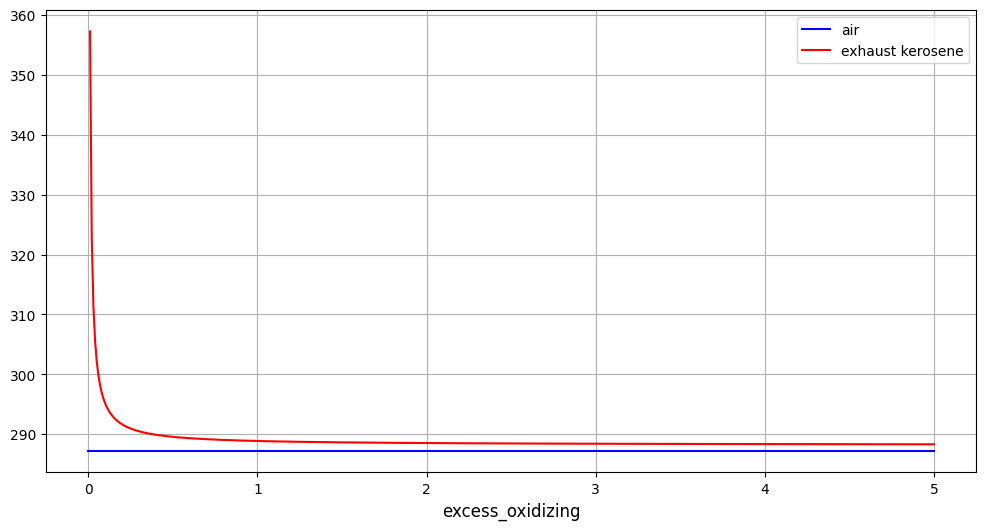

In [8]:
eo = np.linspace(0, 5, 500)

plt.figure(figsize=(12, 6))
plt.xlabel("excess_oxidizing", fontsize=12)

plt.plot(eo, [gas_const("air") for _ in eo], color="blue", label="air")
plt.plot(eo, [gas_const("exhaust", eo, fuel="kerosene") for eo in eo], color="red", label="exhaust kerosene")

plt.legend()
plt.grid()
plt.show()

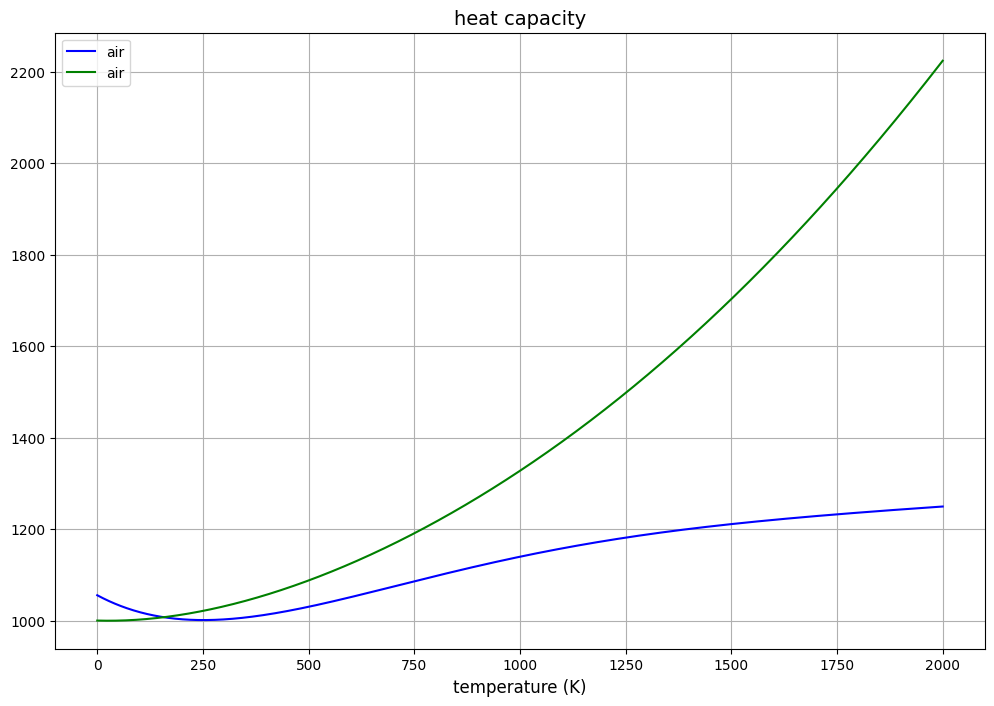

In [9]:
temperature = np.linspace(0, 2000, 1000)


def cp_air(t):
    return heat_capacity_p("N2", t) * 0.7808 + heat_capacity_p("O2", t) * 0.2095 + heat_capacity_p("Ar", t) * 0.0093 + heat_capacity_p("CO2", t) * 0.00034


plt.figure(figsize=(12, 8))
plt.title("heat capacity", fontsize=14)
plt.xlabel("temperature (K)", fontsize=12)
plt.plot(temperature, [heat_capacity_p("air", t) for t in temperature], color="blue", label="air")
plt.plot(temperature, [cp_air(t) for t in temperature], color="green", label="air")
plt.legend()
plt.grid()
plt.show()

AssertionError: type None must be dict[str:float]

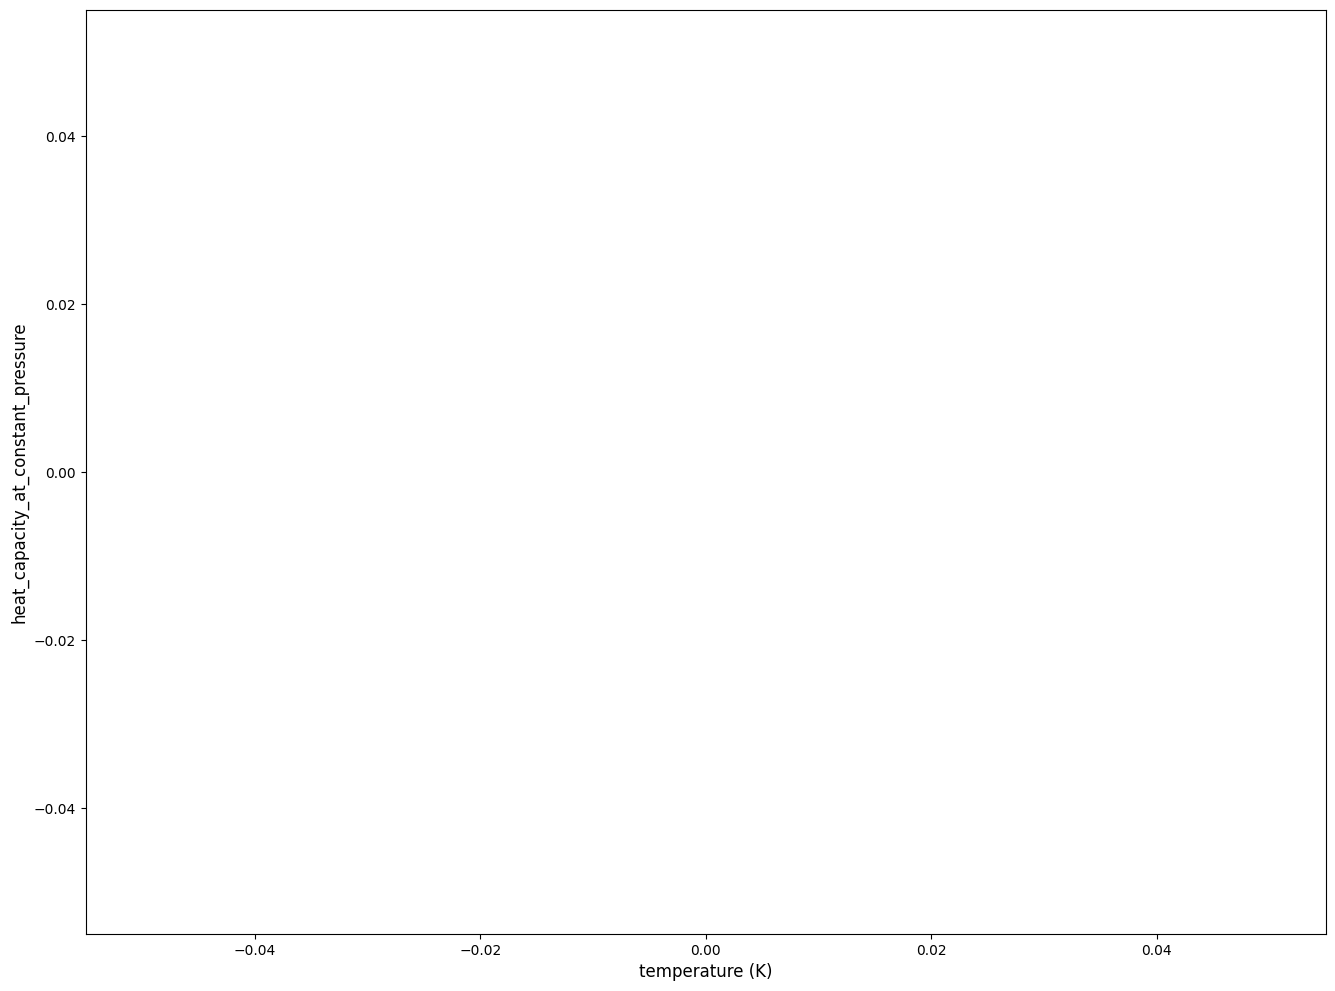

In [14]:
def cpg(t, eo, s):
    if eo < 1:
        return np.nan
    return (heat_capacity_p_exhaust(t) + heat_capacity_p("AIR") * eo * s) / (1 + eo * s)


temperature = np.linspace(0, 2000, 2000)

plt.figure(figsize=(16, 12))
plt.xlabel("temperature (K)", fontsize=12)
plt.ylabel("heat_capacity_at_constant_pressure", fontsize=12)

for eo in range(5):
    plt.plot(temperature, [cpg(t, eo, stoichiometry("kerosene")) for t in temperature], color="red", ls="solid", label=f"exhaust {eo=}")

plt.legend()
plt.grid()
plt.show()